<a href="https://colab.research.google.com/github/Atzingen/IA-FIC2021/blob/main/01_notebook_e_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 

Curso de Inteligência Artificial para tomada de decisões

Este notebook tem como objetivo mostrar um pouco da visualização dos dados e treinamento de modelos para classificação utilizando o dataset mnist e uma rede neural com o framewrok tensorflow. 

# Bibliotecas

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import datasets

# Como notebooks Funcionam

Mais informações nas referências abaixo:

* [Introdução Ao Jupyter Notebook](https://https://www.letscode.com.br/blog/introducao-ao-jupyter-notebook)

* [Site do Jupyter Notebook](https://jupyter.org/)

* [Anaconda](https://www.anaconda.com/products/individual-d)

* [Google Colab](https://colab.research.google.com/)

In [2]:
nome = 'Gustavo'
idade = 30
print(f"Meu nome é {nome} e eu tenho {idade} anos.")

Meu nome é Gustavo e eu tenho 30 anos.


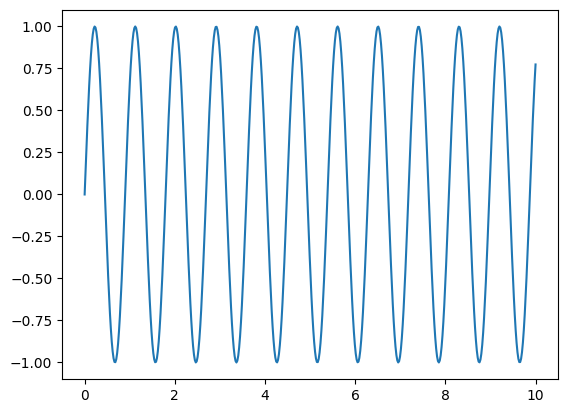

In [3]:
t = np.linspace(0, 10, 500)
y = np.sin(7*t)
plt.plot(t, y)

In [4]:
px.line(t, x=t, y=y, labels={'x': 'Tempo', 'y': 'Seno'}, title='Gráfico de Seno')

In [5]:
(x_train, y_train_raw), (x_test, y_test_raw) = datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train_raw.shape

(60000,)

In [8]:
print(y_train_raw[:5])

[5 0 4 1 9]


In [9]:
x_train[0].shape

(28, 28)

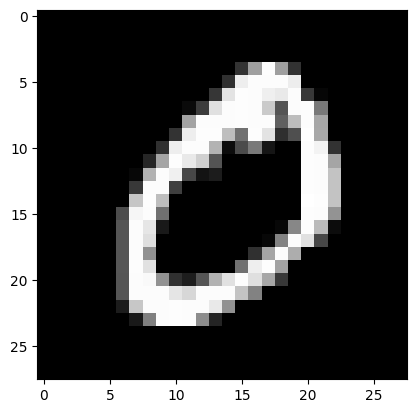

In [10]:
plt.imshow(x_train[1], cmap='gray')

In [11]:
@interact(index=0)
def plot_image(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train_raw[index]}")
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1), Output()), _dom_classes=('widget-interac…

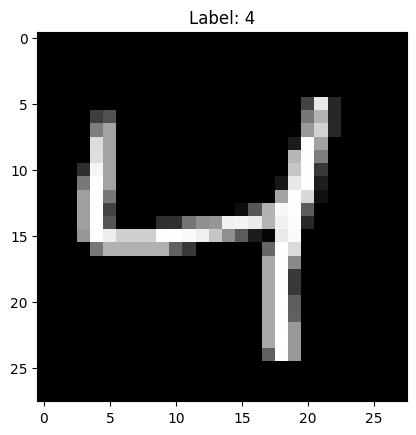

In [12]:
plot_image(2)

# Mnist Dataset

* Vizualização do formato dataset
* Formato e conversão dos labels (one hot array)
* Plot das imagens dos dígitos - plotly express e interact
* Normalização e reshape dos dados

In [13]:
input_shape = (28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Modelo de Rede Neural com tensorflow e keras

In [15]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [16]:
28*28*128 + 128

100480

In [17]:
10*128 + 10

1290

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [20]:
model.fit(x_train, 
         y_train, 
         epochs=10, 
         batch_size=32, 
         validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9160 - loss: 0.2950 - val_accuracy: 0.9563 - val_loss: 0.1541
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9611 - loss: 0.1325 - val_accuracy: 0.9628 - val_loss: 0.1256
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0913 - val_accuracy: 0.9694 - val_loss: 0.1031
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0689 - val_accuracy: 0.9703 - val_loss: 0.1017
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0513 - val_accuracy: 0.9739 - val_loss: 0.0892
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9753 - val_loss: 0.0875
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0322 - val_accuracy: 0.9753 - val_loss: 0.0861
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9927 - loss: 0.0255 - 

In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.0893


[0.08931536972522736, 0.9761000275611877]

# Validação do modelo treinado

Image captured and saved as captured_image.jpg


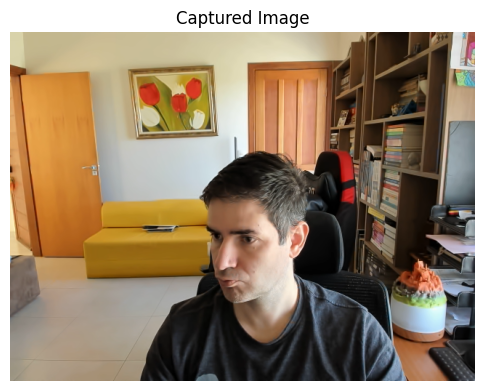

In [22]:
# Check if running in Colab or local environment
try:
  import google.colab
  IN_COLAB = True
except ImportError:
  IN_COLAB = False

if IN_COLAB:
  # Use the take_photo function for Colab
  from IPython.display import Image
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    display(Image(filename))
  except Exception as err:
    print(str(err))
else:
  cap = cv2.VideoCapture(0)
  ret, frame = cap.read()
  
  if ret:
    filename = 'captured_image.jpg'
    cv2.imwrite(filename, frame)
    cap.release()
    print(f'Image captured and saved as {filename}')
    
    plt.figure(figsize=(6, 6))
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Captured Image')
    plt.axis('off')
    plt.show()
  else:
    print("Failed to capture image from webcam")
    cap.release()


In [23]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
img = img/255.0
img = np.expand_dims(img, axis=0)
img=img.reshape(img.shape[0], img.shape[1], img.shape[2], 1)

In [24]:
resultado_one_hot = model.predict(img)
print(resultado_one_hot, np.argmax(resultado_one_hot))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.1288028e-10 8.2574655e-11 7.5773412e-01 4.2174933e-03 4.0043496e-35
  2.3459698e-01 3.4481762e-03 1.7295348e-06 1.4822970e-06 4.1609896e-13]] 2


# Emnist CNN

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [37]:
x_train.shape

(60000, 28, 28)

In [36]:
y_train.shape

(60000, 10)

In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",     # y one-hot (10)
    metrics=["accuracy"],
)

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("mnist_cnn.keras", monitor="val_accuracy", save_best_only=True),
]

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    shuffle=True,
)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9136 - loss: 0.2785
Epoch 2/12
 10/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9781 - loss: 0.0763

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning:

Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:276: UserWarning:

Can save best model only with val_accuracy available.



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9769 - loss: 0.0767
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9835 - loss: 0.0545
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9861 - loss: 0.0442
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9883 - loss: 0.0371
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9890 - loss: 0.0341
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9905 - loss: 0.0302
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9916 - loss: 0.0263
Epoch 9/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9920 - loss: 0.0244
Epoch 10/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9930 - loss: 0.0209
Epoch 11/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9938 - loss: 0.0195
Epoch 12/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9944 - loss: 0.0181


In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"test_loss={test_loss:.4f}  test_acc={test_acc:.4f}")

test_loss=0.0243  test_acc=0.9929


In [46]:
model.save('mnist_cnn.h5')